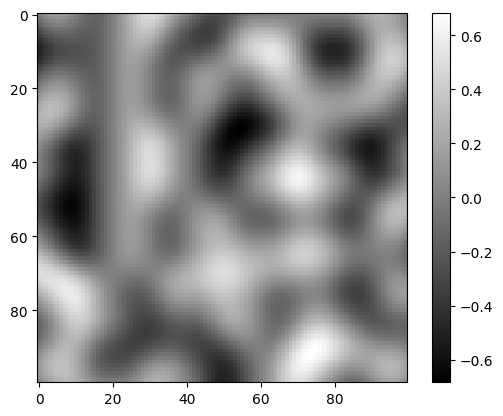

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def fade(t):
    """Fade function to smooth the interpolation."""
    return t * t * t * (t * (t * 6 - 15) + 10)


def lerp(t, a, b):
    """Linear interpolation."""
    return a + t * (b - a)


def gradient(h, x, y):
    """Gradient function. Returns dot product of the gradient vector and the distance vector."""
    vectors = np.array(
        [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    )
    g = vectors[h % 8]
    return g[:, :, 0] * x + g[:, :, 1] * y


def perlin_noise(x, y, seed=0):
    """Generate Perlin noise for coordinates x, y."""
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()

    xi = x.astype(int) & 255
    yi = y.astype(int) & 255

    xf = x - xi
    yf = y - yi

    u = fade(xf)
    v = fade(yf)

    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)

    x1 = lerp(u, n00, n10)
    x2 = lerp(u, n01, n11)

    return lerp(v, x1, x2)


# Generate a grid of coordinates
grid_size = 100
x = np.linspace(0, 5, grid_size, endpoint=False)
y = np.linspace(0, 5, grid_size, endpoint=False)
x, y = np.meshgrid(x, y)

# Compute Perlin noise
noise = perlin_noise(x, y, seed=0)

# Visualize the Perlin noise
plt.imshow(noise, cmap="gray")
plt.colorbar()
plt.show()

In [2]:
from noise import pnoise2

In [3]:
pnoise2(0.5, 0.5, 1)
Width = 100

In [4]:
pnoise2(0.5, 0.5, 1)

-0.125

In [5]:
noise = np.zeros((Width, Width))
for i in range(Width):
    for j in range(Width):
        noise[i][j] = pnoise2(i / Width, j / Width, 100, 0.8)

In [6]:
def add_nested_arrays(a, b):
    final = []
    for row_a, row_b in zip(a, b):
        final.append([x + y for x, y in zip(row_a, row_b)])
    return final

In [7]:
def contrast_split(array, sections=2):
    min = np.min(array)
    max = np.max(array)

    for i in range(len(array)):
        for j in range(len(array)):
            array[i][j] = categorize_split(array[i][j], min, max, sections)


def categorize_split(value, min, max, sections=2):

    for i in range(sections):
        if value < (min + (i + 1) * (max - min) / sections):
            return i / sections

    return i / sections

890


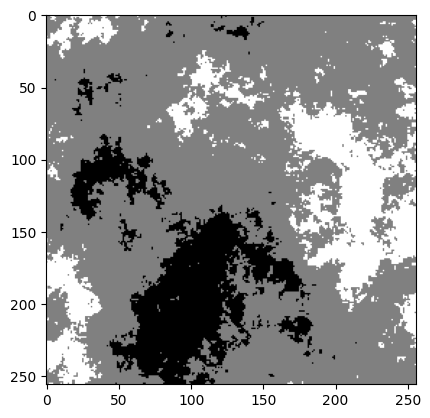

In [31]:
import random
from typing import List


def generate_seed() -> int:
    """Generate a random seed."""
    return random.randint(0, 100)


def initialize_final_pic(n: int) -> List[List[float]]:
    """Initialize the final picture array with zeros."""
    return [[0 for _ in range(n)] for _ in range(n)]


def generate_perlin_noise(
    xpix: int, ypix: int, size: int, real_seed: int, octave: int
) -> List[List[float]]:
    """
    Generate Perlin noise for given parameters.

    Args:
        xpix (int): Number of pixels in x direction.
        ypix (int): Number of pixels in y direction.
        size (int): Size of the noise.
        real_seed (int): Seed for the noise.
        octave (int): Octave of the noise.
    """
    final_pic = initialize_final_pic(xpix)
    for i in range(xpix):
        for j in range(ypix):
            noise_val = pnoise2(
                (i / xpix) * size + real_seed,
                (j / ypix) * size + real_seed,
                octave,
                0.8,
            )
            final_pic[i][j] += noise_val
    return final_pic


def apply_contrast_split(final_pic: List[List[float]], sections: int) -> None:
    """
    Apply contrast split to the final picture.

    Args:
        final_pic (List[List[float]]): Final picture array.
        sections (int): Number of sections to split the contrast.
    """
    contrast_split(final_pic, sections)


def plot_image(image: List[List[float]], cmap: str = "gray") -> None:
    """Plot the given image."""
    plt.imshow(image, cmap=cmap)
    plt.show()


def main_execution(octaves: List[int], n: int, size: int, splits: int) -> None:
    seed = generate_seed()
    real_seed = seed * 10

    final_pic = initialize_final_pic(n)

    for index, octave in enumerate(octaves):
        xpix, ypix = n, n
        noise_pic = generate_perlin_noise(xpix, ypix, size, real_seed, octave)
        final_pic = add_nested_arrays(final_pic, noise_pic)

    print(real_seed)
    apply_contrast_split(final_pic, splits)
    plot_image(final_pic)


# Main execution
octaves = [25]
n = 256
size = 1
main_execution(octaves, n, size, 3)

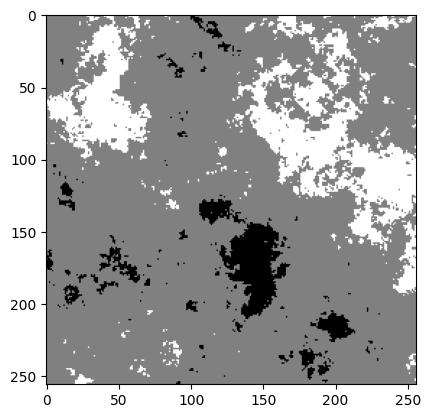

In [32]:
plt.imshow(final_pic, cmap="gray")